# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [119]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

sns.set(style='darkgrid')
filterwarnings('ignore')

In [104]:
X = load_npz('x.npz')
y = np.load('y.npy')

In [105]:
y = 2 * y - 1

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_val.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

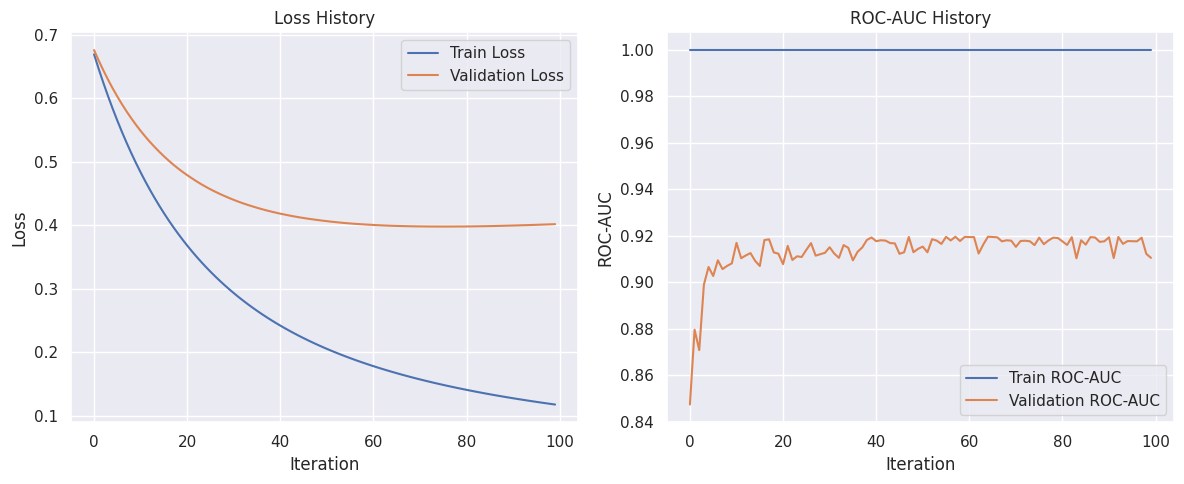

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9105
Test ROC-AUC 0.9096


In [107]:
boosting = Boosting(plot=True, n_estimators=100)

boosting.fit(X_train, y_train, X_val, y_val)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

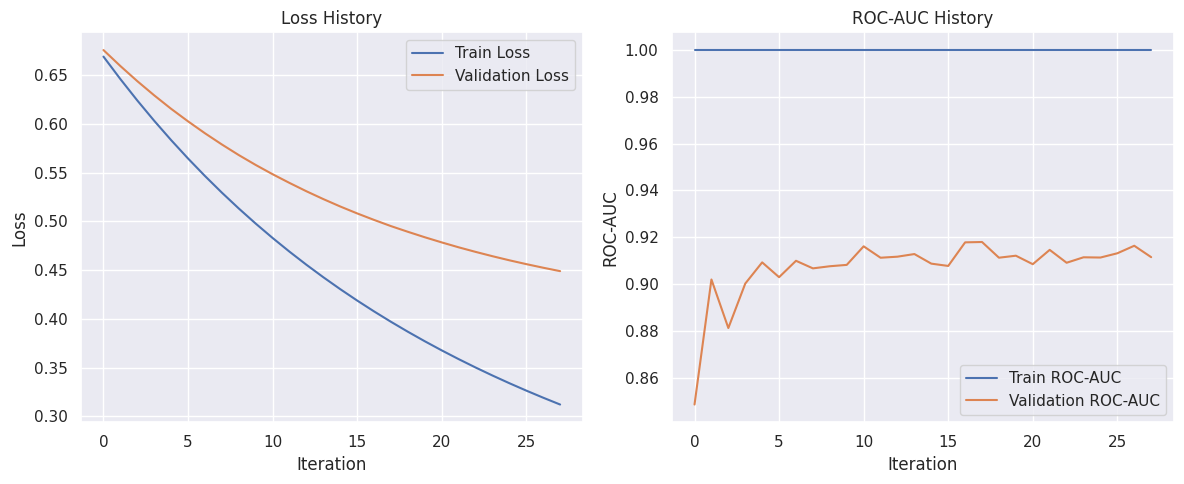

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9116
Test ROC-AUC 0.9107


In [ ]:
boosting = Boosting(plot=True, early_stopping_rounds=10, n_estimators=50)

boosting.fit(X_train, y_train, X_val, y_val)

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** По сути дела, мы просто объединиим лин модели, получив снова лин модель, т.е. можно было сразу делать такую лин модель. Кажется, что это не особо имеет смысл</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

In [ ]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import time

xgb_model = XGBClassifier(
    booster="gblinear",
    learning_rate=0.1,
    n_estimators=50,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)
y_train_ = (y_train + 1) // 2
y_val_ = (y_val + 1) // 2
start_time = time.time()
xgb_model.fit(X_train, y_train_, eval_set=[(X_train, y_train_), (X_val, y_val_)], verbose=False)
xgb_time = time.time() - start_time

xgb_loss_train = xgb_model.evals_result()["validation_0"]["logloss"]
xgb_loss_val = xgb_model.evals_result()["validation_1"]["logloss"]

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [ ]:
sgd_model = SGDClassifier(
    loss="log_loss", eta0=0.001, random_state=42
)

sgd_loss_train, sgd_loss_val = [], []
start_time = time.time()

unique_classes = np.unique(y_train)

for i in range(50):
    sgd_model.partial_fit(X_train, y_train, classes=unique_classes)
    y_pred_train = sgd_model.predict_proba(X_train)
    y_pred_val = sgd_model.predict_proba(X_val)
    sgd_loss_train.append(log_loss(y_train, y_pred_train))
    sgd_loss_val.append(log_loss(y_val, y_pred_val))

sgd_time = time.time() - start_time

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие параметры у бустинга и линейной модели:

- время обучения
- число итераций до сходимости
- графики функции потерь на трейне и на валидации

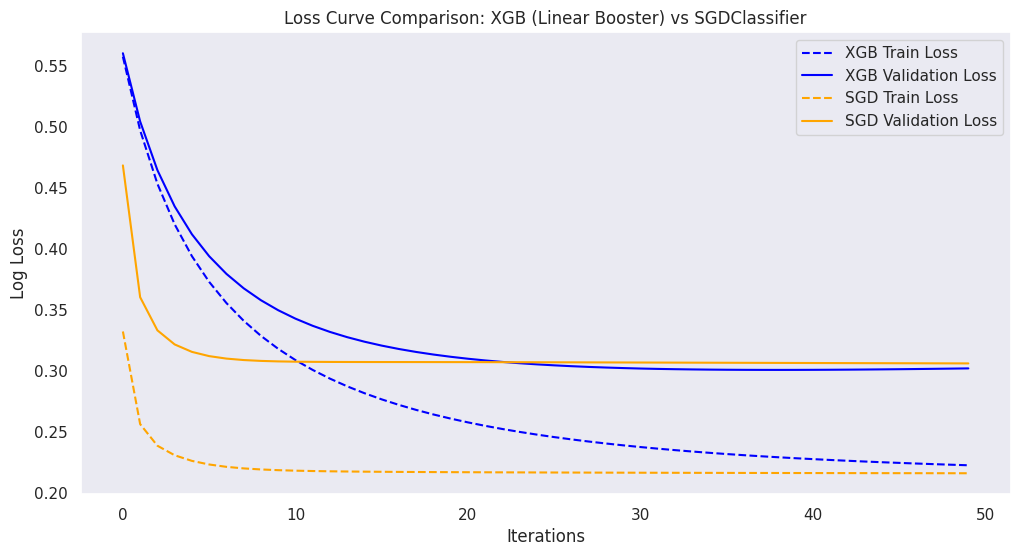

XGB Time: 0.20 seconds
SGD Time: 1.11 seconds
XGB Final Train Loss: 0.2224
SGD Final Train Loss: 0.2159


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xgb_loss_train, label="XGB Train Loss", linestyle="--", color="blue")
plt.plot(xgb_loss_val, label="XGB Validation Loss", linestyle="-", color="blue")
plt.plot(sgd_loss_train, label="SGD Train Loss", linestyle="--", color="orange")
plt.plot(sgd_loss_val, label="SGD Validation Loss", linestyle="-", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Loss Curve Comparison: XGB (Linear Booster) vs SGDClassifier")
plt.legend()
plt.grid()
plt.show()

print(f"XGB Time: {xgb_time:.2f} seconds")
print(f"SGD Time: {sgd_time:.2f} seconds")
print(f"XGB Final Train Loss: {xgb_loss_train[-1]:.4f}")
print(f"SGD Final Train Loss: {sgd_loss_train[-1]:.4f}")

Параметры видны выше.

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** Вывод в том, что получается суть одно и то же</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = -\log(X^t)$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** Стоит отмеить, что бустрап не дает новой информации о выборке, просто вместо истинной функци распределения, мы начинаем абузить выборочную. Тем самым, при достаточно адекватных обстоятельствах, изменить смещение мы не должны (легкий импакт остается). Разброс же ассимпотически должнен падать. Таким образом, вообще, штука полезная </font>

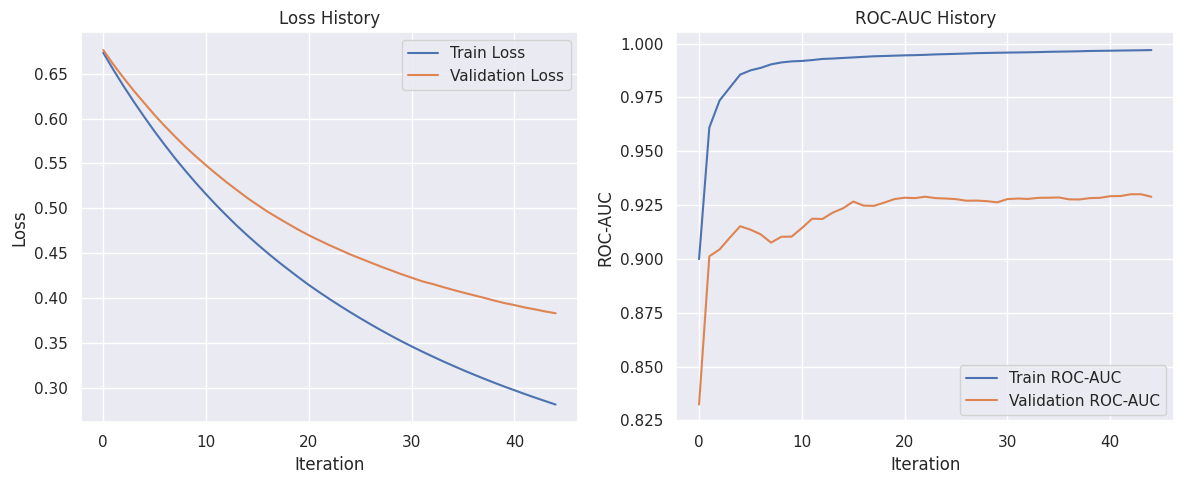

Train ROC-AUC 0.9970
Valid ROC-AUC 0.9289
Test ROC-AUC 0.9252


In [ ]:
boosting = Boosting(plot=True, n_estimators=45, subsample=0.3, bootstrap_type="Bernoulli")

boosting.fit(X_train, y_train, X_val, y_val)

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Оба работают хорошо и улучшили показатель.

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

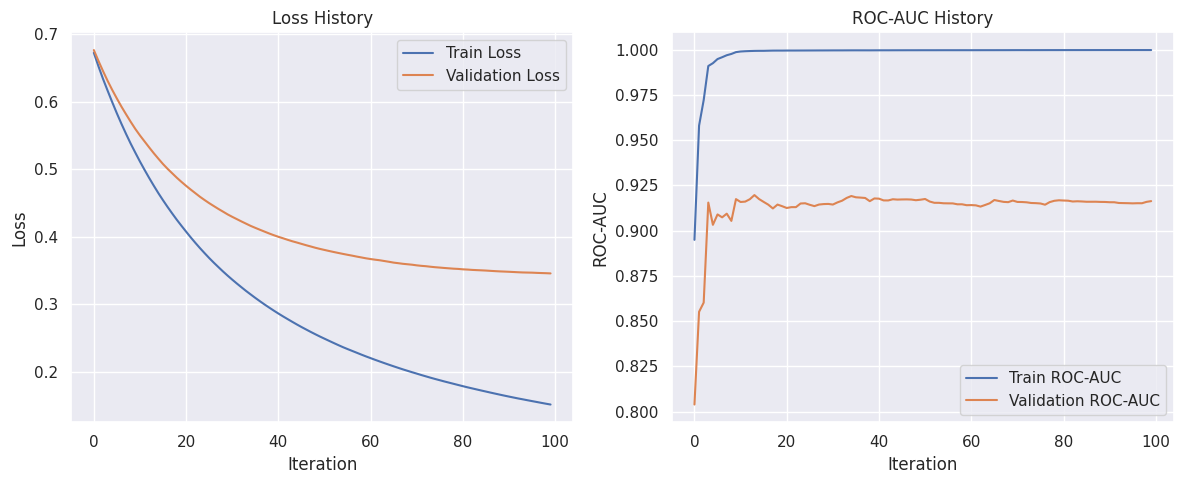

Train ROC-AUC 0.9997
Valid ROC-AUC 0.9163
Test ROC-AUC 0.9197


In [96]:
boosting = Boosting(
    n_estimators=100,
    goss=True,
    goss_k=0.2,
    goss_subsample=0.3,
    plot=True,
)

boosting.fit(X_train, y_train, X_val, y_val)

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Видим, что тут из-за разделения градиентов бывает уходим не совсем туда, куда надо. В целом метод работает

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: Квантизация вообще помогает, когда у нас пеерменные больше категориальные, чем числовые (отношение значений не отражает реальной сути). Наны и выбросы мы будем обрабатывать по категориям, тем самым уменьшая их влияние на модель.   </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: Это не очень хорошая затея, исходя из написанного выше, т.к. мы рискуем ввести отношение порядка между бинами. Т.е. да, влияет какого число (какой бин) мы им назначим </font>

In [ ]:
entropy_model = Boosting(
    quantization_type='Uniform',
    nbins=255,
    rsm=0.8
)

entropy_model.fit(X_train, y_train)
print(f'Train ROC-AUC {entropy_model.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {entropy_model.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {entropy_model.score(X_test, y_test):.4f}')

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9227
Test ROC-AUC 0.9185


### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [ ]:
entropy_model = Boosting(
    quantization_type='MinEntropy',
    nbins=255,
    rsm=0.8
)

entropy_model.fit(X_train, y_train)
print(f'Train ROC-AUC {entropy_model.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {entropy_model.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {entropy_model.score(X_test, y_test):.4f}')

Train ROC-AUC 0.9985
Valid ROC-AUC 0.9152
Test ROC-AUC 0.9141


#### Как видим, качество не особо улучшилось (в целом оно осталось на том же уровне).

В этом бонусе использовался промпт. Код вроде работает (с некоторой докруткой его), но то ли это, что просили, утвердать не берусь.

Промпт:
I give you creative freedom - feel free to make any suggestions. However, I think you can find necessary code information in functions quantize_features (i bet parts about uniform and quantile are ok, but the other two might need fixes) (i believe to make correct implementation of this function we need to rewrite fit finction (maybe we can add new function, that will count statistics)). Now, you can start your verification, follow the statement below.

Ну и условие этого пункта.

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

In [97]:
feature_importance_model = Boosting(
    n_estimators=100,
    learning_rate=0.1,
)

feature_importance_model.fit(X_train, y_train)

Покажите, какие признаки оказались самыми важными

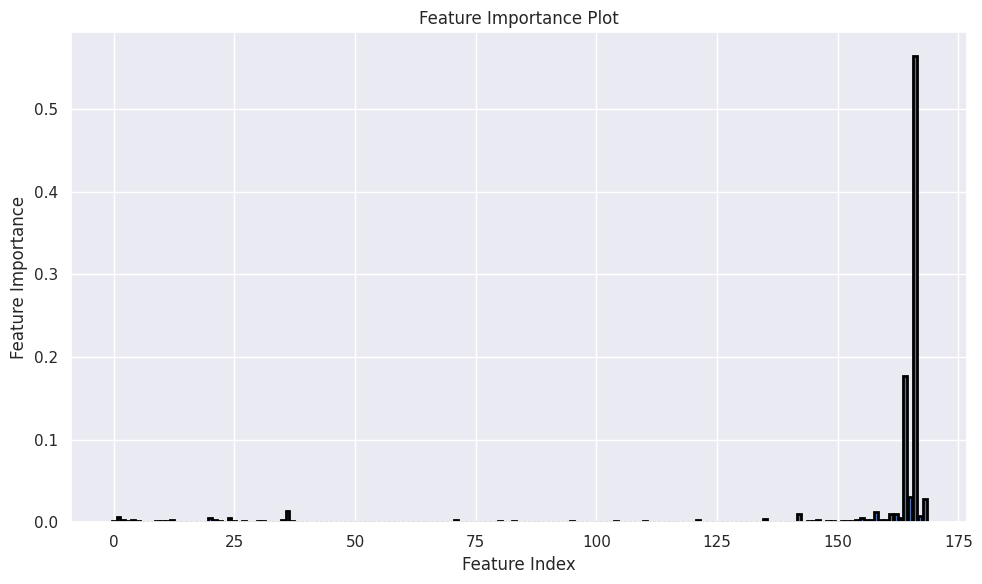

In [98]:
importances = feature_importance_model.feature_importances_
features = range(len(importances))

plt.figure(figsize=(10, 6))
plt.bar(features, importances, linewidth=2, edgecolor='black')
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.tight_layout()
plt.show()

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

Почитал я статью, переводя на русский язык я сделал вот что: считаю градиент лосса по части деревьев, а затем меняю веса вообще всех деревьев (я долго не мог понять, надо ли эти веса модифицировать на все итерации, или только на одну).

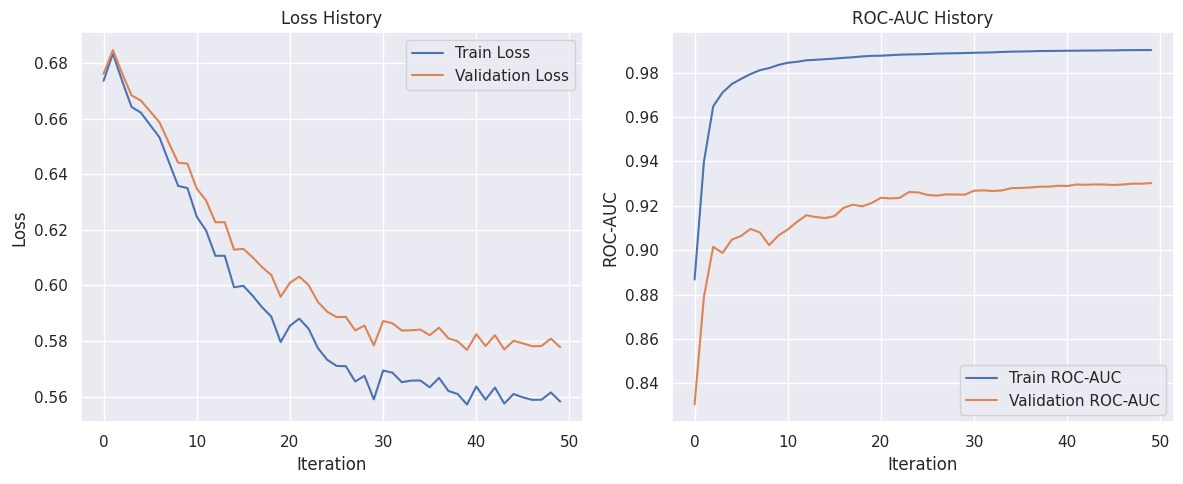

Train ROC-AUC 0.9901
Valid ROC-AUC 0.9302
Test ROC-AUC 0.9329


In [125]:
dart_model = Boosting(
    n_estimators=50,
    dart=True,
    dropout_rate=0.1,
    subsample=0.2,
    plot=True
)

dart_model.fit(X_train, y_train, X_val, y_val)

print(f'Train ROC-AUC {dart_model.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {dart_model.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {dart_model.score(X_test, y_test):.4f}')

Как видим, качество очень даже существенное, но лучше бы этот метод объединить с каим нибудь бутстрапом

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial, model="custom_boosting"):
    common_params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200, step=5),
    }

    optional_params = {
        "subsample": trial.suggest_float("subsample", 0.1, 0.5),
        "bootstrap_type": "Bernoulli",
    }

    params = {**common_params, **optional_params}

    boosting = Boosting(**params)
    boosting.fit(X_train, y_train)
    y_pred = boosting.predict_proba(X_val)

    log_loss_score = log_loss(y_val, y_pred)
    return log_loss_score

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=25)

print("Best parameters:", study.best_params)

[I 2024-12-23 08:19:06,993] A new study created in memory with name: no-name-0be27ae9-5493-4522-912c-869bc6197c3d
[I 2024-12-23 08:20:46,027] Trial 0 finished with value: 0.5056207871365802 and parameters: {'learning_rate': 0.010253509690168494, 'max_depth': 10, 'n_estimators': 160, 'subsample': 0.3394633936788146}. Best is trial 0 with value: 0.5056207871365802.
[I 2024-12-23 08:20:53,769] Trial 1 finished with value: 0.6724478640124643 and parameters: {'learning_rate': 0.0026368755339723046, 'max_depth': 4, 'n_estimators': 55, 'subsample': 0.4464704583099741}. Best is trial 0 with value: 0.5056207871365802.
[I 2024-12-23 08:21:03,384] Trial 2 finished with value: 0.47858410045423116 and parameters: {'learning_rate': 0.041917115166952006, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.4879639408647978}. Best is trial 2 with value: 0.47858410045423116.
[I 2024-12-23 08:21:15,675] Trial 3 finished with value: 0.3284219247972842 and parameters: {'learning_rate': 0.1764971584817571, '

Best parameters: {'learning_rate': 0.42220896753562887, 'max_depth': 6, 'n_estimators': 120, 'subsample': 0.10431955143810669}


In [ ]:
optuna.visualization.plot_param_importances(study)

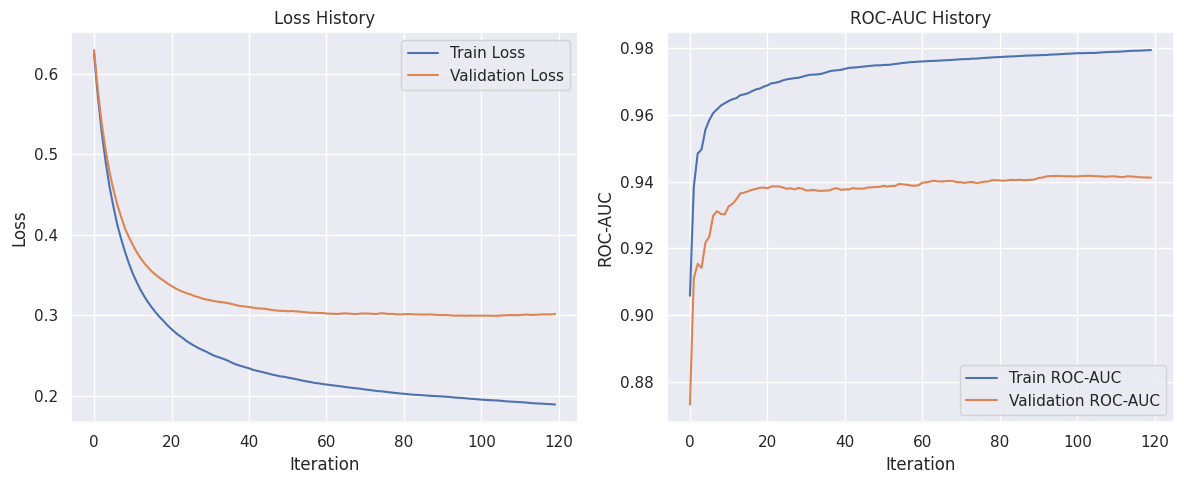

Train ROC-AUC 0.9794
Valid ROC-AUC 0.9412
Test ROC-AUC 0.9399


In [ ]:
boosting = Boosting(**study.best_params, plot=True)

boosting.fit(X_train, y_train, X_val, y_val)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

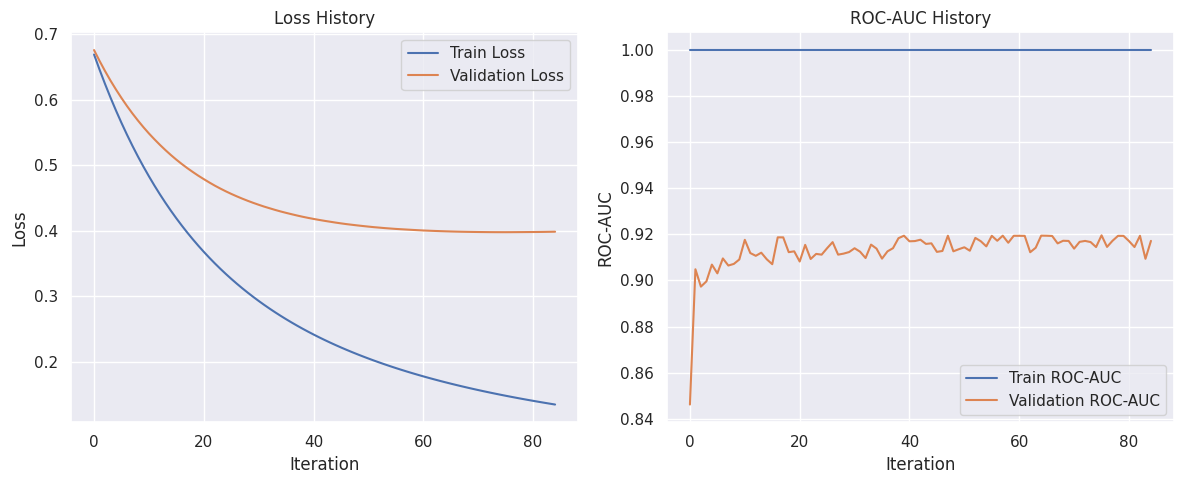

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9171
Test ROC-AUC 0.9151


In [ ]:
boosting = Boosting(plot=True, n_estimators=85)

boosting.fit(X_train, y_train, X_val, y_val)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Как видим, лучшие параметры действительно лучшие параметры

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [ ]:
import optuna
from optuna.pruners import MedianPruner

def objective(trial, model="custom_boosting"):
    common_params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200, step=5),
    }

    optional_params = {
        "subsample": trial.suggest_float("subsample", 0.1, 0.5),
        "bootstrap_type": "Bernoulli",
    }

    params = {**common_params, **optional_params}

    boosting = Boosting(**params)

    start_time = time.time()
    boosting.fit(X_train, y_train)
    y_pred = boosting.predict_proba(X_val)
    log_loss_score = log_loss(y_val, y_pred)
    elapsed_time = time.time() - start_time
    trial.set_user_attr("elapsed_time", elapsed_time)
    trial.set_user_attr("score", log_loss_score)
    return log_loss_score

storage = "sqlite:///optuna_study.db"
sampler = TPESampler(seed=42)

study = optuna.create_study(
    direction="minimize",
    pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=10),
    study_name="boosting_optimization",
    storage=storage,
    sampler=sampler,
    load_if_exists=True,
)

study.optimize(objective, n_trials=25)

print("Best parameters:", study.best_params)
print("Best Log-Loss:", study.best_value)

[I 2024-12-23 13:09:36,850] A new study created in RDB with name: boosting_optimization
[I 2024-12-23 13:10:43,328] Trial 0 finished with value: 0.505651520546964 and parameters: {'learning_rate': 0.010253509690168494, 'max_depth': 10, 'n_estimators': 160, 'subsample': 0.3394633936788146}. Best is trial 0 with value: 0.505651520546964.
[I 2024-12-23 13:10:51,024] Trial 1 finished with value: 0.6724783436152609 and parameters: {'learning_rate': 0.0026368755339723046, 'max_depth': 4, 'n_estimators': 55, 'subsample': 0.4464704583099741}. Best is trial 0 with value: 0.505651520546964.
[I 2024-12-23 13:11:01,006] Trial 2 finished with value: 0.4785686631232318 and parameters: {'learning_rate': 0.041917115166952006, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.4879639408647978}. Best is trial 2 with value: 0.4785686631232318.
[I 2024-12-23 13:11:13,137] Trial 3 finished with value: 0.32772632383051087 and parameters: {'learning_rate': 0.1764971584817571, 'max_depth': 4, 'n_estimators':

Best parameters: {'learning_rate': 0.22520625266526478, 'max_depth': 5, 'n_estimators': 165, 'subsample': 0.2800361526611074}
Best Log-Loss: 0.2959070932085215


In [ ]:
print(study.best_params)

{'learning_rate': 0.22520625266526478, 'max_depth': 5, 'n_estimators': 165, 'subsample': 0.2800361526611074}


In [ ]:
optuna.visualization.plot_param_importances(study)

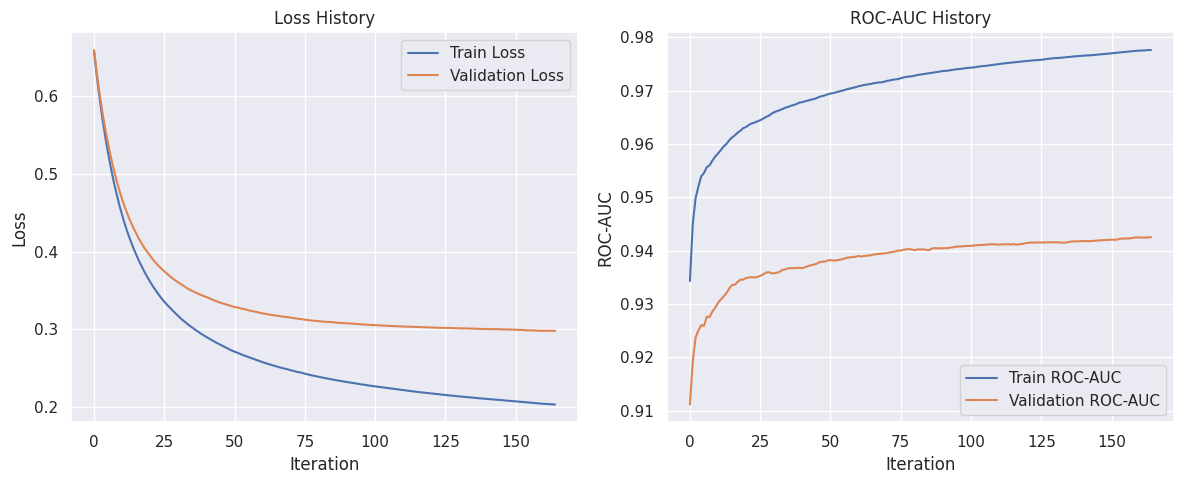

Train ROC-AUC 0.9776
Valid ROC-AUC 0.9425
Test ROC-AUC 0.9398


In [ ]:
boosting = Boosting(**study.best_params, plot=True)

boosting.fit(X_train, y_train, X_val, y_val)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Я бы сказал, что особо выигрыша по времени мы не получили, т.к. сей жадник видимо хорошо работает когда параметров побольше. В целом, по времни получается приблизительно то же самое, но вот логирование прикольно, действительно позволяет запараллелить процесс, а потом смержить полученные результаты.

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

Так если посмотерь выше, то вроде у LightGBM-a в среднем фишки находились чаще, чем у его конкурентов. Заиспользуем его.

In [ ]:
import optuna
from optuna.pruners import MedianPruner
import lightgbm as lgb
import time

def objective(trial, model="lightgbm"):
    common_params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200, step=5),
    }

    optional_params = {
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.0, 5.0),
    }

    params = {**common_params, **optional_params}
    boosting = lgb.LGBMClassifier(**params)

    start_time = time.time()
    boosting.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="logloss",
    )
    y_pred = boosting.predict_proba(X_val)
    elapsed_time = time.time() - start_time

    log_loss_score = log_loss(y_val, y_pred)

    trial.set_user_attr("elapsed_time", elapsed_time)
    trial.set_user_attr("log_loss_score", log_loss_score)

    return log_loss_score


storage = "sqlite:///optuna_study.db"
sampler = TPESampler(seed=42)

study = optuna.create_study(
    direction="minimize",
    pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=10),
    study_name="boosting_optimization",
    storage=storage,
    sampler=sampler,
    load_if_exists=True,
)

study.optimize(objective, n_trials=25)
model = lgb.LGBMClassifier(**study.best_params)

start_time = time.time()
evals_result = {}
model.fit(
    X_train,
    y_train_,
    eval_set=[(X_train, y_train_), (X_val, y_val_)],
    eval_metric="logloss",
    callbacks=[
        lgb.record_evaluation(evals_result),
    ],
)
end_time = time.time() - start_time

In [ ]:
print(study.best_params)

{'learning_rate': 0.32089226358119854, 'max_depth': 4, 'n_estimators': 90, 'boosting_type': 'dart', 'num_leaves': 91, 'min_child_samples': 83, 'min_gain_to_split': 1.4091349122295693}


Best parameters: {'learning_rate': 0.32089226358119854, 'max_depth': 4, 'n_estimators': 90, 'boosting_type': 'dart', 'num_leaves': 91, 'min_child_samples': 83, 'min_gain_to_split': 1.4091349122295693}
Best Log-Loss: 0.28434242886862987
Training time for the best LightGBM model: 0.67 seconds
[LightGBM] [Warning] min_gain_to_split is set=1.4091349122295693, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4091349122295693
ROC-AUC on the test set: 0.9400


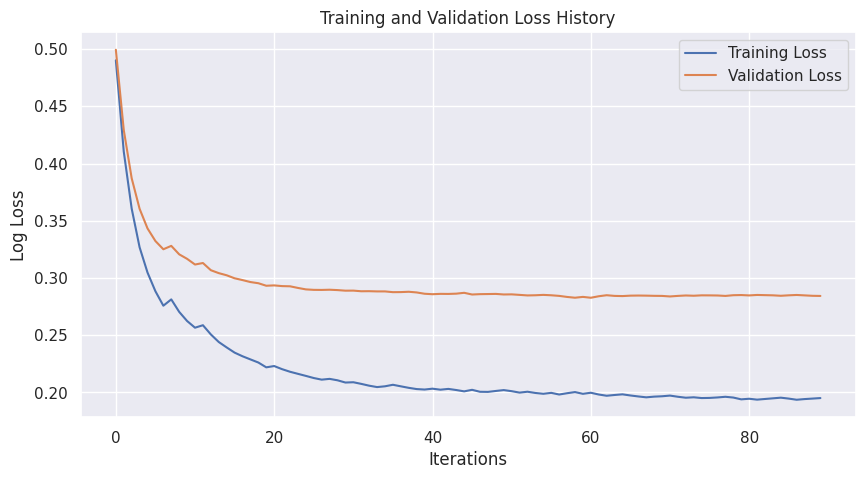

In [ ]:
from sklearn.metrics import roc_auc_score
print("Best parameters:", study.best_params)
print("Best Log-Loss:", study.best_value)
print(f"Training time for the best LightGBM model: {end_time:.2f} seconds")
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC on the test set: {roc_auc:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(evals_result["training"]["binary_logloss"], label="Training Loss")
plt.plot(evals_result["valid_1"]["binary_logloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Training and Validation Loss History")
plt.show()

Как видим, динамика лосса у моделей очень схожа, при этом lgbm учится в разы быстрее (меньше секунды, в то время как кастомная около минуты).

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: Как видим, LGB~~T~~M имеет лучшие метрики, причем учится за считанные секунды. Про другие библиотеки могу сказать, что они тоже хороши. Вроде если почитать историю, то lgbm продвигался как xgboost с прикрученной оптимизацией, потому оставим его. </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
from lightgbm import LGBMClassifier

def random_forest_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 20),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "objective": "binary",
        "boosting_type": "rf",
        "bagging_freq": 1,
        "random_state": 42,
        "verbose": 0
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
              eval_metric="logloss", callbacks=[lgb.early_stopping(stopping_rounds=10)])
    val_loss = model.evals_result_["valid_0"]["binary_logloss"][-1]
    return val_loss

study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(random_forest_objective, n_trials=30)

best_rf_params = study_rf.best_params
rf_model = LGBMClassifier(**study_rf.best_params)
rf_model.fit(X_train, y_train_, eval_set=[(X_train, y_train_), (X_val, y_val_)], eval_metric="logloss")

Best params Random Forest: {'n_estimators': 76, 'max_depth': 12, 'num_leaves': 50, 'min_data_in_leaf': 10, 'feature_fraction': 0.8683649929701085, 'bagging_fraction': 0.5925989873925424}


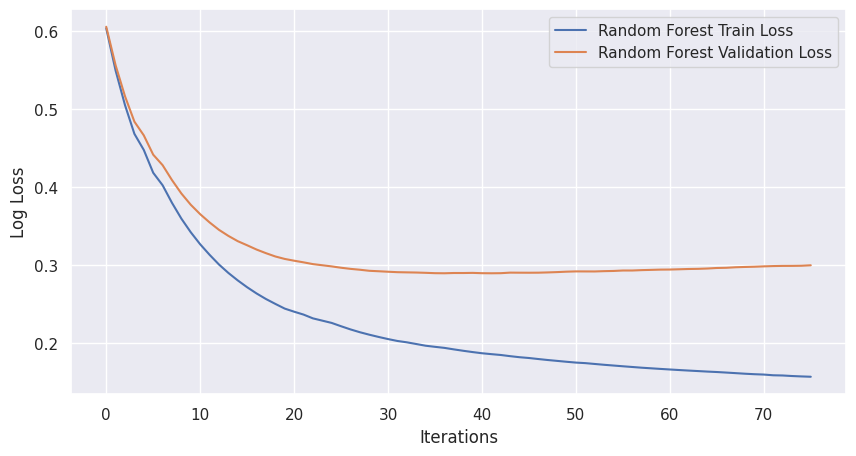

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8683649929701085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8683649929701085
[LightGBM] [Warning] bagging_fraction is set=0.5925989873925424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5925989873925424
Score for Random Forest: 0.8704


In [ ]:
print("Best params Random Forest:", study_rf.best_params)

plt.figure(figsize=(10, 5))
plt.plot(rf_model.evals_result_["training"]["binary_logloss"], label="Random Forest Train Loss")
plt.plot(rf_model.evals_result_["valid_1"]["binary_logloss"], label="Random Forest Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

rf_accuracy = rf_model.score(X_test, (y_test + 1) // 2)
print(f"Score for Random Forest: {rf_accuracy:.4f}")

Ну обучился он заметно быстрее, правда, как видим, и переобчился.

В целом, я бы сказал, что у алгоритма есть свои преимущества и ниши, в которых его использование оптимально (какие нибудь мобильные устройства). Но бустинг мне понравился больше)

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

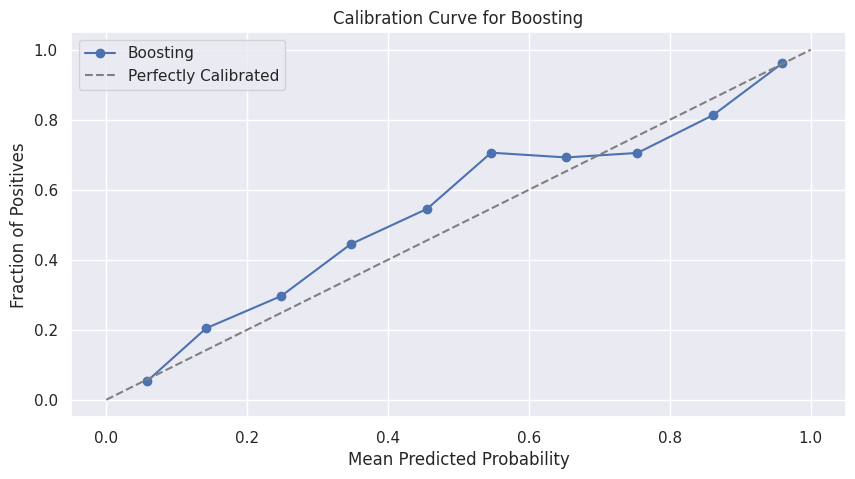

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

boosting_prob = boosting.predict_proba(X_val)[:, 1]
#for lightgbm get the same result
prob_true, prob_pred = calibration_curve(y_val, boosting_prob, n_bins=10)

plt.figure(figsize=(10, 5))
plt.plot(prob_pred, prob_true, label="Boosting", marker="o")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.title("Calibration Curve for Boosting")
plt.show()


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

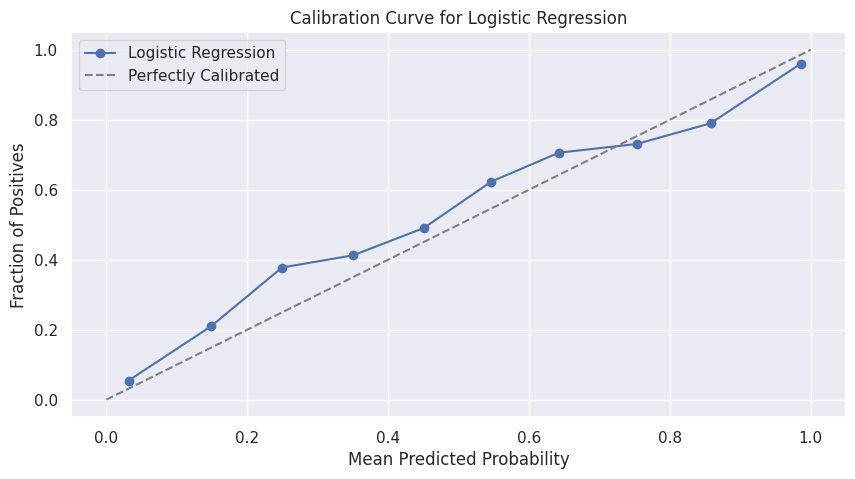

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_prob = logistic_model.predict_proba(X_val)[:, 1]
prob_true_lr, prob_pred_lr = calibration_curve(y_val, logistic_prob, n_bins=10)

plt.figure(figsize=(10, 5))
plt.plot(prob_pred_lr, prob_true_lr, label="Logistic Regression", marker="o")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.title("Calibration Curve for Logistic Regression")
plt.show()

Как мы видим, предсказывать вероятности мы могем довольно хорошо (при этом, кривая двоольна похожа на реузльтат от лог регрессии). Это очень приятно, но в целом логично, ведь оптимизировались мы по-сути как раз по лог лоссу, а потому приход к результату с адекватными вероятностями можно объяснить тем же способом, как и для лог рега.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

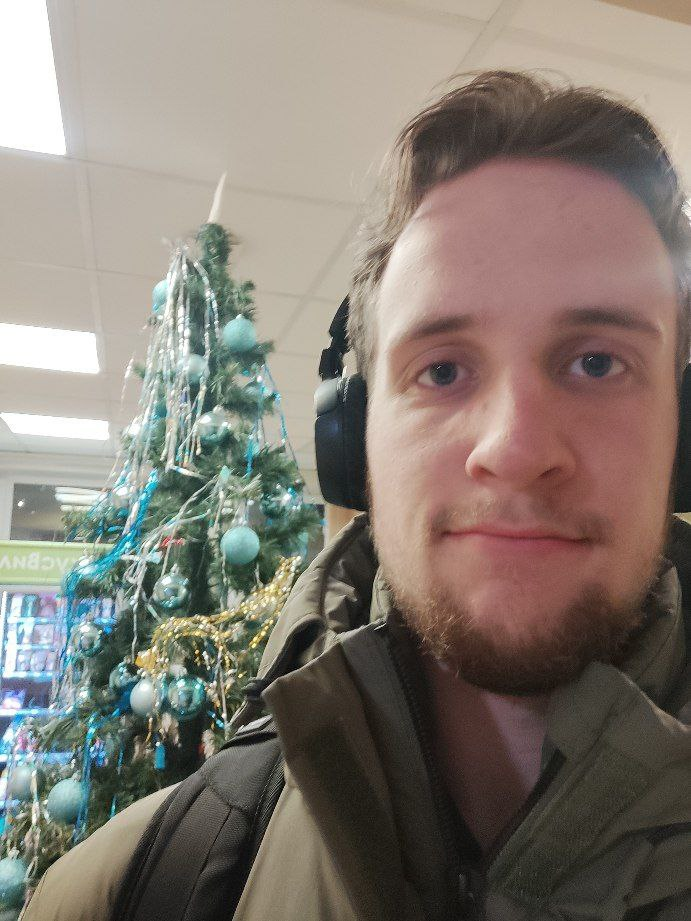

Это я возле ёлки в общаге) Тут пока сдать бы экз по ОТВ, а дальше наслаждаться восходом благодарной вселенной.